In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import cv2
import glob
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import multiprocessing
import tensorflow as tf
from pathlib import Path
import concurrent.futures
import keras.backend as K
from time import perf_counter
from functools import lru_cache
import matplotlib.pyplot as plt
from keras import layers, models
from PIL import Image, ImageEnhance
from joblib import Parallel, delayed
from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder
from keras.metrics import Precision, Recall, AUC
from keras.callbacks import LearningRateScheduler
from keras.utils import plot_model, to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from concurrent.futures import ThreadPoolExecutor, as_completed
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import os
import cv2
import itertools
import numpy as np
import pandas as pd
from keras.metrics import Precision, Recall, AUC
from sklearn.metrics import accuracy_score, classification_report
from time import perf_counter

data = []

In [ ]:
from google.colab import drive
import os

# Define the directory containing your data
data_dir = "/content/drive/My Drive/Alzheimer_s Dataset"

# Check the contents of the directory
print(os.listdir(data_dir))

# Assuming 'train' directory exists inside 'Alzheimer_s Dataset'
train_dir = os.path.join(data_dir, "train")

# Check the contents of the train directory
print(os.listdir(train_dir))

# Now you can iterate through the contents of the train directory
for dirtrain in os.listdir(train_dir):
    print(dirtrain)
    for tr in os.listdir(os.path.join(train_dir, dirtrain)):
        print(tr)

Streaming output truncated to the last 5000 lines.
verymildDem1771.jpg
verymildDem1779.jpg
verymildDem177.jpg
verymildDem1770.jpg
verymildDem1774.jpg
verymildDem178.jpg
verymildDem1766.jpg
verymildDem1784.jpg
verymildDem1781.jpg
verymildDem1768.jpg
verymildDem1777.jpg
verymildDem1775.jpg
verymildDem1776.jpg
verymildDem194.jpg
verymildDem182.jpg
verymildDem1787.jpg
verymildDem181.jpg
verymildDem187.jpg
verymildDem196.jpg
verymildDem189.jpg
verymildDem186.jpg
verymildDem197.jpg
verymildDem18.jpg
verymildDem184.jpg
verymildDem195.jpg
verymildDem193.jpg
verymildDem180.jpg
verymildDem188.jpg
verymildDem191.jpg
verymildDem1789.jpg
verymildDem192.jpg
verymildDem185.jpg
verymildDem1790.jpg
verymildDem190.jpg
verymildDem1788.jpg
verymildDem19.jpg
verymildDem183.jpg
verymildDem1791.jpg
verymildDem179.jpg
verymildDem203.jpg
verymildDem215.jpg
verymildDem201.jpg
verymildDem20.jpg
verymildDem200.jpg
verymildDem207.jpg
verymildDem21.jpg
verymildDem204.jpg
verymildDem217.jpg
verymildDem2.jpg
verymild

In [ ]:
import cv2
import os

# Assuming test_dir is defined
test_dir = "/content/drive/My Drive/Alzheimer_s Dataset/test"

# Assuming data is defined as an empty list to store image data and labels
data = []

# Iterate through directories in test_dir
for dirtest in os.listdir(test_dir):
    print(dirtest)

    # Iterate through files in each directory
    for ts in os.listdir(os.path.join(test_dir, dirtest)):
        # Read image using OpenCV
        img = cv2.imread(os.path.join(test_dir, dirtest, ts))

        # Check if the image is successfully read
        if img is not None:
            # Resize the image to (224, 224)
            img = cv2.resize(img, (224, 224))

            # Reshape the image
            img = img.reshape(224, 224, 3)

            # Append the image and its corresponding label to the data list
            data.append([img, dirtest])


NonDemented
ModerateDemented
VeryMildDemented
MildDemented


In [ ]:
import random
random.seed(20)

In [ ]:
import numpy as np

# Example placeholder data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y_train = np.array([0, 1, 0, 1, 0])

# Placeholder values for n_splits and test_size
n_splits = 3
test_size = 0.5  # Adjusted test_size parameter

from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

for train_index, test_index in strat_shuff_split.split(X_train, y_train):
    X_train_shuffled, X_test_val = X_train[train_index], X_train[test_index]
    y_train_shuffled, y_test_val = y_train[train_index], y_train[test_index]


In [ ]:
x, y = [], []
for e in data:
    x.append(e[0])
    y.append(e[1])

print(x)
print(y)

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,

In [ ]:
from sklearn.preprocessing import OneHotEncoder

x = np.array(x)
y = np.array(y)
y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore').fit(y)
print(enc.categories_)
y = enc.transform(y).toarray()
print(f'Data   :   {str(x.shape)}')
print(f'Labels :   {str(y.shape)}')

[array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype='<U16')]
Data   :   (1279, 224, 224, 3)
Labels :   (1279, 4)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (224, 224, 3)

def attention_module(x):
  avg_pool = layers.GlobalAveragePooling2D()(x)
  max_pool = layers.GlobalMaxPooling2D()(x)

  combined = layers.concatenate([avg_pool, max_pool])
  combined = layers.Reshape((1, 1, combined.shape[1]))(combined)

  dense = layers.Dense(combined.shape[3] // 8,
                       activation = 'relu')(combined)
  dense = layers.Dense(x.shape[-1], activation = 'sigmoid')(dense)

  attention = layers.Reshape((1, 1, x.shape[-1]))(dense)
  attention = layers.Multiply()([x, attention])

  return attention

# Input layer
inputs = keras.Input(shape=input_shape)

# Block 1
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv2D_1')(inputs)
#conv11 = layers.Conv2D(32, (5, 5), padding='same', activation='relu', name='Conv2D_11')(inputs)
#concat = layers.concatenate([conv1, conv11], axis=-1)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='MaxPooling2D_1')(x)
x = layers.BatchNormalization(name='BatchNormalization_1')(x)

# Block 2
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv2D_2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='MaxPooling2D_2')(x)
x = layers.BatchNormalization(name='BatchNormalization_2')(x)

# Block 3
x = layers.Conv2D(96, (3, 3), padding='same', activation='relu', name='Conv2D_3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='MaxPooling2D_3')(x)
x = layers.BatchNormalization(name='BatchNormalization_3')(x)

# Block 4
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv2D_4')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='MaxPooling2D_4')(x)
x1 = layers.BatchNormalization(name='BatchNormalization_4')(x)

# Spatial Attention
y1 = layers.MaxPooling2D((2, 2), strides=(1, 1), name='MaxPooling2D_y1')(x1)
y2 = layers.AvgPool2D((2, 2), strides=(1, 1), name='AvgPool2D_y2')(x1)
concat = layers.Concatenate()([y1, y2])
y3 = layers.Conv2D(4, (7, 7), activation='relu', name='Conv2D_y')(concat)
y4 = layers.Conv2D(32, (3, 3), padding='same', dilation_rate=2, name='Conv2D_y2')(y3)
y4 = layers.BatchNormalization(name='BatchNormalization_y')(y4)
y4 = layers.ReLU()(y4)
#y = layers.DepthwiseConv2D((3, 3), padding='same', activation='relu', name='DepthwiseConv2D_y')(y)

# Skip Connection (M)
z = layers.MaxPooling2D((2, 2), strides=(2, 2), name='MaxPooling2D_z')(x1)
concat_m = layers.Concatenate()([y4, z])

# Block 5
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv2D_5')(x1)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='MaxPooling2D_5')(x)
x = layers.BatchNormalization(name='BatchNormalization_5')(x)

# Block 6
x = layers.DepthwiseConv2D((3, 3), padding="same", activation='relu', name='DepthwiseConv2D_1')(x)
x = layers.BatchNormalization(name='BatchNormalization_6')(x)

# Block 7
gap1 = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_1')(x)
gap2 = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_2')(concat_m)
concat_gap = layers.Concatenate()([gap1, gap2])

# Output layer
outputs = layers.Dense(4, activation='softmax', name='Output_Dense')(concat_gap)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv2D_1 (Conv2D)           (None, 224, 224, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 MaxPooling2D_1 (MaxPooling  (None, 112, 112, 64)         0         ['Conv2D_1[0][0]']            
 2D)                                                                                              
                                                                                                  
 BatchNormalization_1 (Batc  (None, 112, 112, 64)         256       ['MaxPooling2D_1[0][0]']  

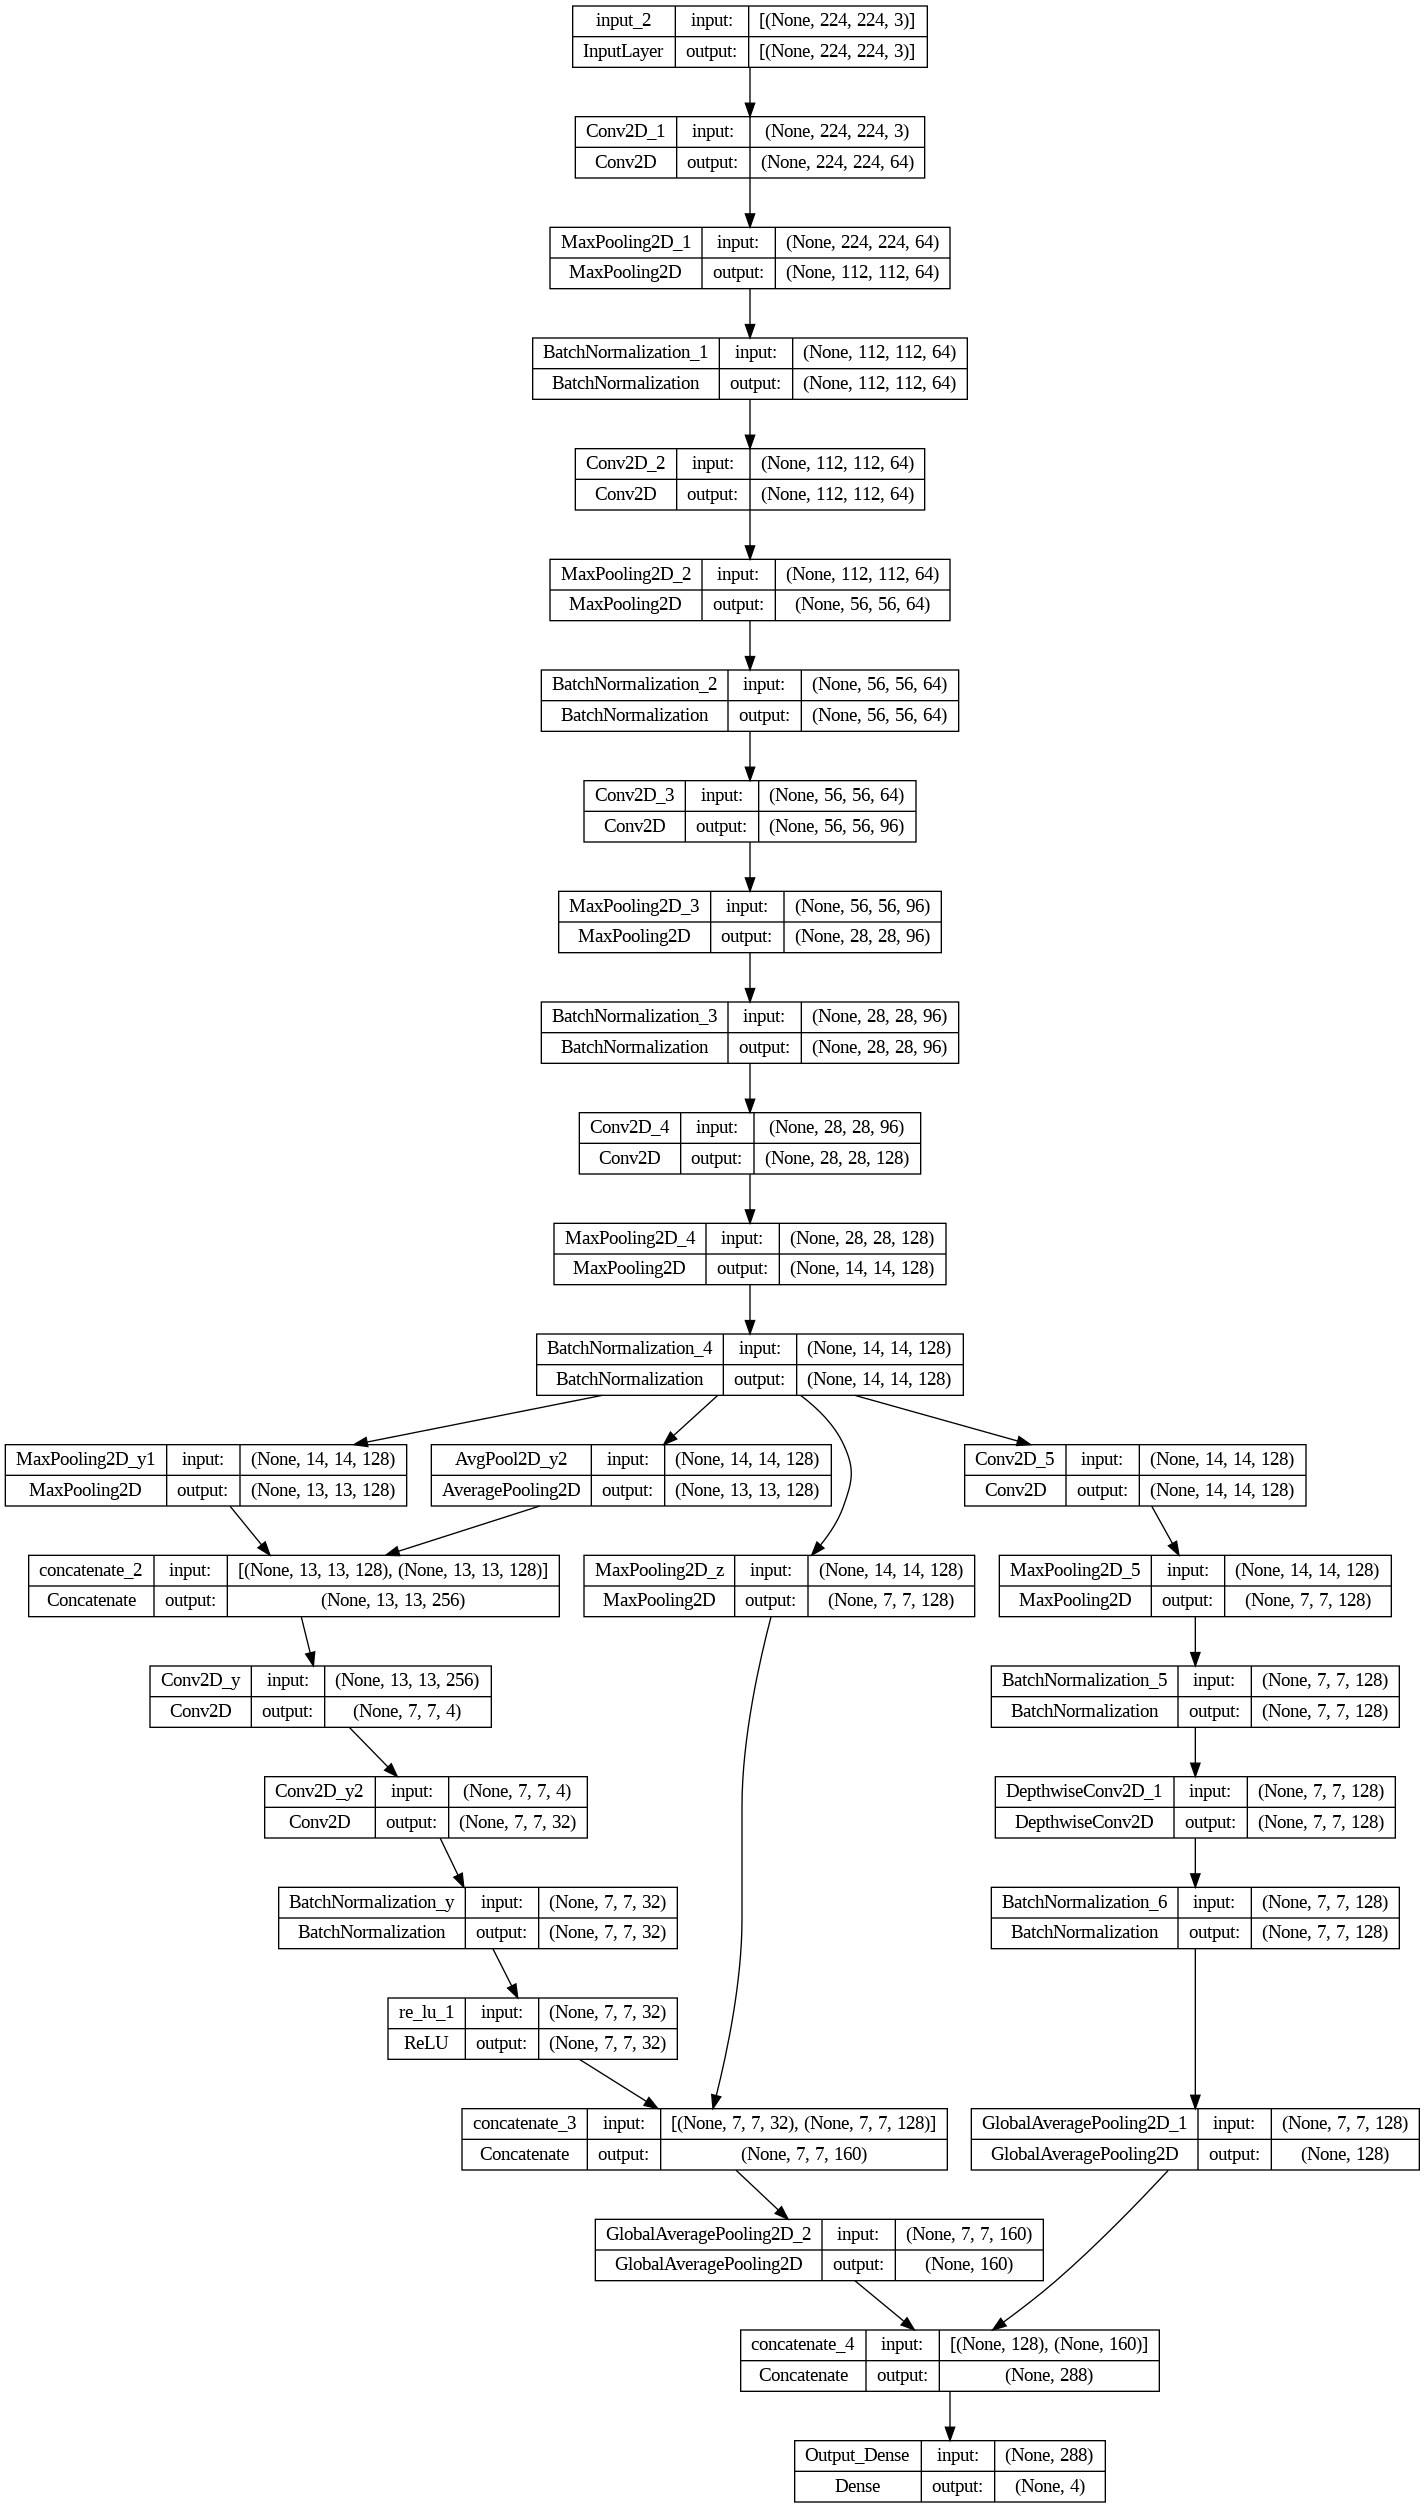

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
def create_metrics():
    """
    Creates instances of various metrics for evaluating model performance.

    Returns:
        tuple: A tuple of the metrics: (recall, precision, f1_score, auc, sensitivity, specificity, mcc).
    """
    @tf.function
    def f1_score(y_true, y_pred):
        """
        Calculates the F1 score.

        Args:
            y_true: True labels.
            y_pred: Predicted labels.

        Returns:
            Tensor: F1 score.
        """
        tp = true_positive(y_true, y_pred)
        fp = false_positive(y_true, y_pred)
        fn = false_negative(y_true, y_pred)

        precision = tp / (tp + fp + K.epsilon())
        recall = tp / (tp + fn + K.epsilon())

        return 2 * (precision * recall) / (precision + recall + K.epsilon())

    @tf.function
    def specificity(y_true, y_pred):
        """
        Calculates the specificity.

        Args:
            y_true: True labels.
            y_pred: Predicted labels.

        Returns:
            Tensor: Specificity.
        """
        tn = true_negative(y_true, y_pred)
        fp = false_positive(y_true, y_pred)

        return tn / (tn + fp + K.epsilon())

    @tf.function
    def sensitivity(y_true, y_pred):
        """
        Calculates the sensitivity.

        Args:
            y_true: True labels.
            y_pred: Predicted labels.

        Returns:
            Tensor: Sensitivity.
        """
        tp = true_positive(y_true, y_pred)
        fn = false_negative(y_true, y_pred)

        return tp / (tp + fn + K.epsilon())

    @tf.function
    def mcc(y_true, y_pred):
        """
        Calculates the Matthews correlation coefficient (MCC).

        Args:
            y_true: True labels.
            y_pred: Predicted labels.

        Returns:
            Tensor: Matthews correlation coefficient.
        """
        tp = true_positive(y_true, y_pred)
        tn = true_negative(y_true, y_pred)
        fp = false_positive(y_true, y_pred)
        fn = false_negative(y_true, y_pred)

        numerator = (tp * tn - fp * fn)
        denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

        return numerator / (denominator + K.epsilon())

    @tf.function
    def true_positive(y_true, y_pred):
        """
        Calculates the number of true positives.

        Args:
            y_true: True labels.
            y_pred: Predicted labels.

        Returns:
            Tensor: Number of true positives.
        """
        y_pred_pos, _, y_pos, _ = calculate_confusion_matrix(y_true, y_pred)
        return K.sum(y_pos * y_pred_pos)

    @tf.function
    def false_positive(y_true, y_pred):
        """
        Calculates the number of false positives.

        Args:
            y_true: True labels.
            y_pred: Predicted labels.

        Returns:
            Tensor: Number of false positives.
        """
        y_pred_pos, _, _, y_neg = calculate_confusion_matrix(y_true, y_pred)
        return K.sum(y_neg * y_pred_pos)

    @tf.function
    def false_negative(y_true, y_pred):
        """
        Calculates the number of false negatives.

        Args:
            y_true: True labels.
            y_pred: Predicted labels.

        Returns:
            Tensor: Number of false negatives.
        """
        _, y_pred_neg, y_pos, _ = calculate_confusion_matrix(y_true, y_pred)
        return K.sum(y_pos * y_pred_neg)

    @tf.function
    def true_negative(y_true, y_pred):
        """
        Calculates the number of true negatives.

        Args:
            y_true: True labels.
            y_pred: Predicted labels.

        Returns:
            Tensor: Number of true negatives.
        """
        _, y_pred_neg, _, y_neg = calculate_confusion_matrix(y_true, y_pred)
        return K.sum(y_neg * y_pred_neg)

    @tf.function
    def calculate_confusion_matrix(y_true, y_pred):
        """
        Calculates the components of the confusion matrix.

        Args:
            y_true: True labels.
            y_pred: Predicted labels.

        Returns:
            tuple: A tuple containing the components of the confusion matrix: (y_pred_pos, y_pred_neg, y_pos, y_neg).
        """
        y_pred_pos = K.round(K.clip(y_pred, 0, 1))
        y_pred_neg = 1 - y_pred_pos
        y_pos = K.round(K.clip(y_true, 0, 1))
        y_neg = 1 - y_pos
        return y_pred_pos, y_pred_neg, y_pos, y_neg

    precision = Precision()
    recall = Recall()
    f1_score = f1_score
    specificity = specificity
    sensitivity = sensitivity
    mcc = mcc
    auc = AUC()

    return (
        precision,
        recall,
        f1_score,
        specificity,
        sensitivity,
        mcc,
        auc,
    )

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', create_metrics()])

epochs = 35

initial_learning_rate=0.0009

def lr_scheduler(epoch):
    if epoch < 7:
      return initial_learning_rate
    else:
      return initial_learning_rate * 0.95 #** (epoch - 6)

lr_callback = LearningRateScheduler(lr_scheduler)

# Create the EarlyStopping callback
#early_stopping_callback = EarlyStopping(
#    monitor='val_loss',  # Monitor the validation loss
#    patience=10,         # Stop training after 10 epochs of no improvement
#    restore_best_weights=True  # Restore the best weights observed during training
#)

optimizer_ad = Adam(learning_rate=initial_learning_rate)

start_time = perf_counter()

history = model.fit(
    x_train, y_train,
    epochs=35,
    validation_split=0.2, batch_size=32,verbose=1,shuffle=True,
    callbacks=[lr_callback] #callbacks=[lr_callback, early_stopping_callback]
)
end_time = perf_counter()

Epoch 1/35
26/26 [==============================] - 20s 248ms/step - loss: 1.0067 - accuracy: 0.5306 - precision: 0.6380 - recall: 0.3447 - f1_score: 0.4407 - specificity: 0.9353 - sensitivity: 0.3492 - mcc: 0.3570 - auc: 0.8143 - val_loss: 6.6159 - val_accuracy: 0.0098 - val_precision: 0.0098 - val_recall: 0.0098 - val_f1_score: 0.0089 - val_specificity: 0.6696 - val_sensitivity: 0.0089 - val_mcc: -0.3214 - val_auc: 0.3549 - lr: 9.0000e-04
Epoch 2/35
26/26 [==============================] - 2s 79ms/step - loss: 0.8356 - accuracy: 0.6247 - precision: 0.7014 - recall: 0.4768 - f1_score: 0.5687 - specificity: 0.9332 - sensitivity: 0.4772 - mcc: 0.4760 - auc: 0.8722 - val_loss: 2.7749 - val_accuracy: 0.3512 - val_precision: 0.3512 - val_recall: 0.3512 - val_f1_score: 0.3671 - val_specificity: 0.7890 - val_sensitivity: 0.3671 - val_mcc: 0.1561 - val_auc: 0.4636 - lr: 9.0000e-04
Epoch 3/35
26/26 [==============================] - 2s 76ms/step - loss: 0.7333 - accuracy: 0.6907 - precision: 0

In [ ]:
execution_time = end_time - start_time

milliseconds = int(execution_time * 1000)
seconds, milliseconds = divmod(milliseconds, 1000)
minutes, seconds = divmod(seconds, 60)
hours, minutes = divmod(minutes, 60)

time_string = f"{hours} hours, " if hours else ""
time_string += f"{minutes} minutes, " if minutes else ""
time_string += f"{seconds} seconds, " if seconds else ""
time_string += f"{milliseconds} milliseconds"

print(f"Model training took {time_string}")

Model training took 2 minutes, 25 seconds, 274 milliseconds


In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose=2)
y_pred = model.predict(x_test).argmax(axis=1)
print(f'Test Accuracy : {loss_and_metrics[1]}')

8/8 - 0s - loss: 0.1369 - accuracy: 0.9609 - precision: 0.9609 - recall: 0.9609 - f1_score: 0.9609 - specificity: 0.9870 - sensitivity: 0.9609 - mcc: 0.9479 - auc: 0.9952 - 241ms/epoch - 30ms/step
8/8 [==============================] - 0s 19ms/step
Test Accuracy : 0.9609375


In [ ]:
def plot_metrics(hist, metric_name_list):
    """
    Plots the given metrics for the training and validation sets.

    Args:
        hist: a Keras History object containing the training history
        metric_name_list: a list of strings representing the names of the metrics to plot

    Returns:
        None
    """
    num_metrics = len(metric_name_list)

    figure, axes = plt.subplots(num_metrics, figsize=(10, 6 * num_metrics))

    rng = range(1, len(hist.history[metric_name_list[0]]) + 1)

    for ax, metric_n in zip(axes, metric_name_list):
        metric = hist.history[metric_n]
        v_metric = hist.history[f"val_{metric_n}"]

        ax.plot(rng, metric, label=metric_n)
        ax.plot(rng, v_metric, label=f"val_{metric_n}")
        ax.legend()
        ax.set_xlabel("Epochs")

        if metric_n in ("auc", "mcc"):
            ax.set_ylabel(metric_n.upper())
            ax.set_title(metric_n.upper() + " vs Epochs")
        else:
            ax.set_ylabel(metric_n.capitalize())
            ax.set_title(metric_n.capitalize() + " vs Epochs")

        max_loss = max(max(metric), max(v_metric))
        min_loss = min(min(metric), min(v_metric))
        y_max = math.ceil(max_loss)

        if min_loss > 0 or max_loss > 1:
            ax.set_ylim(0, y_max)
        else:
            ax.set_ylim(min_loss, y_max)

        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_xlim(1, len(metric))

    plt.tight_layout()

    plt.show()

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'f1_score', 'specificity', 'sensitivity', 'mcc', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1_score', 'val_specificity', 'val_sensitivity', 'val_mcc', 'val_auc', 'lr'])


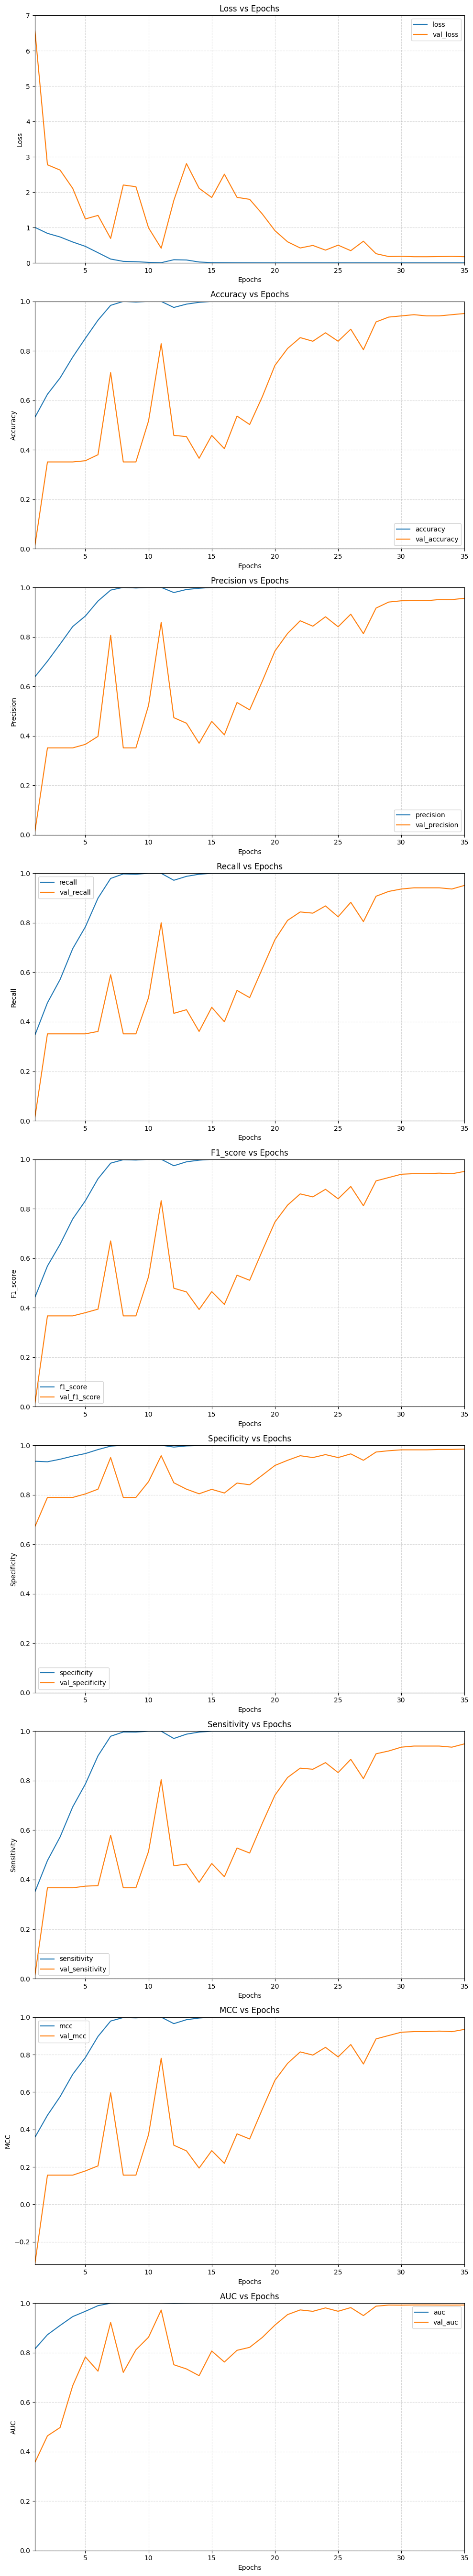

In [ ]:
metric_names = ["loss", "accuracy", "precision", "recall", "f1_score",
                "specificity", "sensitivity", "mcc", "auc"]
plot_metrics(history, metric_names)

8/8 [==============================] - 0s 23ms/step


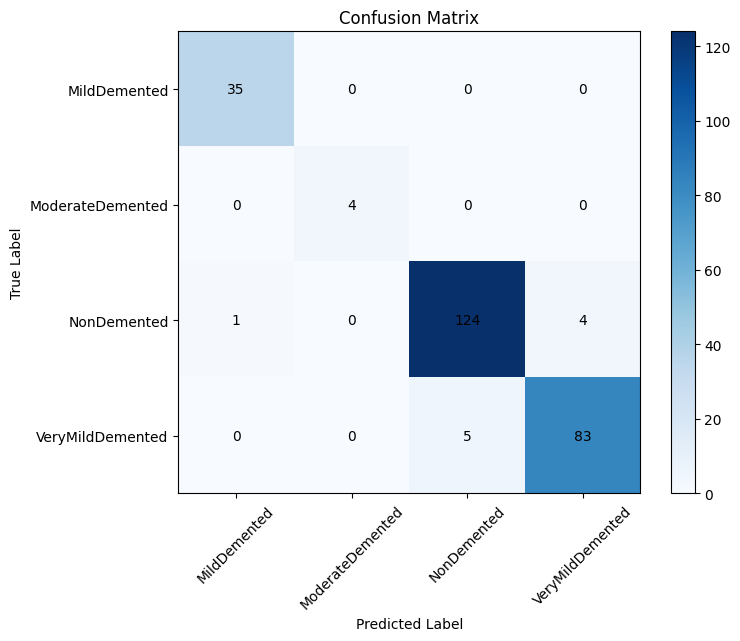

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

# Assuming you have your training and testing data loaded and preprocessed
classes = ['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented']

# Shuffle the test data
x_test, y_test = shuffle(x_test, y_test)

# Predict probabilities for each class
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels to class labels
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)

# Annotate each cell with its respective count
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')  # Change color to black

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()